<a href="https://colab.research.google.com/github/datajcthemax/playdata/blob/main/day20_Decision_Tree%EC%99%80_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20번째 이야기
- 앙상블
- Decision Tree와 Random Forest
- 깃팀플 가이드

# ML 모델에서 주요변수를 뽑는 방법

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/datas/따릉이/train.csv')

In [ ]:
data.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
y = data.pop('count')
X = data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
pred = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.6446952275142156

In [ ]:
data.columns, len(data.columns)

(Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
        'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
        'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'],
       dtype='object'),
 10)

In [ ]:
dt_model.feature_importances_, dt_model.feature_importances_.shape

(array([0.02262362, 0.60649602, 0.18237982, 0.00710239, 0.03411971,
        0.03072634, 0.03062585, 0.0384112 , 0.03047073, 0.01704432]),
 (10,))

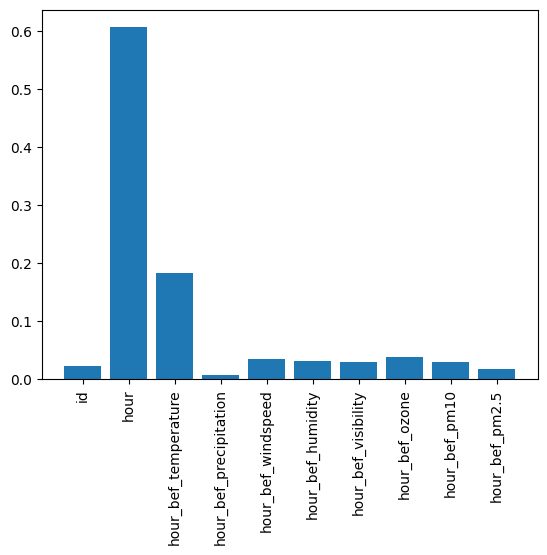

In [ ]:
import matplotlib.pyplot as plt
plt.bar(data.columns, dt_model.feature_importances_)
plt.xticks(rotation=90);

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
pred = rf_model.predict(X_test)

In [ ]:
r2_score(y_test, pred)

0.7829109521146091

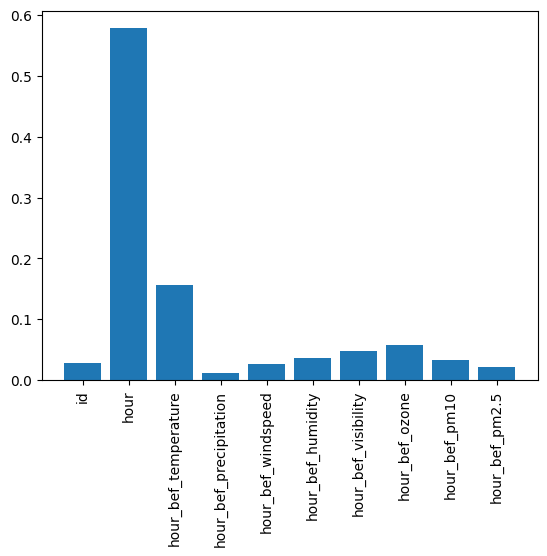

In [ ]:
plt.bar(data.columns, rf_model.feature_importances_)
plt.xticks(rotation=90);

## 깃팀플
- 다음주 수요일까지 마무리 + 내용 공유
- 깃 실습 충실히
- 전처리, 모델링, 시각화 파트 분업
- 각 단계별 인터페이스 협의
- 더미 데이터 생성하여 개발에 활용(옵션)